# Demo FDM

Este notebook muestra paso a paso:

1. Construcción de la malla  
2. Ensamble de la matriz y vector de carga  
3. Snapshots de la solución en distintos tiempos  

In [ ]:
import sys
sys.path.insert(0, '../src')   

import numpy as np
import matplotlib.pyplot as plt
from fdm import solve_fdm, montarA, fuente

# Parámetros de ejemplo
nx, ny    = 16, 16
Lx, Ly    = 1.0, 1.0
D, k      = 0.5, 0.5
theta     = 0.5
dt_factor = 0.01
Tfin      = 0.1

dx = Lx/(nx-1)
dy = Ly/(ny-1)

# Construimos la malla
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y, indexing='ij')

# Campo de velocidad de ejemplo
Vx = np.ones_like(X)
Vy = 0.01 * np.ones_like(Y)


## 1. Construcción de la malla

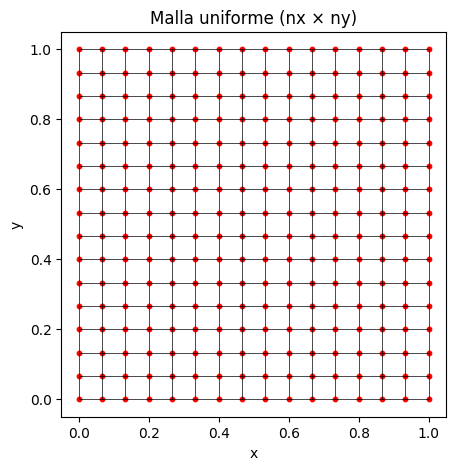

In [2]:
plt.figure(figsize=(5,5))
# Líneas de la malla
for xi in x:
    plt.plot([xi]*ny, y, 'k-', lw=0.5)
for yi in y:
    plt.plot(x, [yi]*nx, 'k-', lw=0.5)
# Nodos
plt.scatter(X, Y, c='red', s=10)
plt.gca().set_aspect('equal')
plt.title('Malla uniforme (nx × ny)')
plt.xlabel('x'); plt.ylabel('y')
plt.show()


## 2. Ensamble de la matriz A y vector de carga


In [3]:
A = montarA(Vx, Vy, nx, ny, dx, dy, D, k)
print("Forma de A:", A.shape)
print("Número de no-ceros (nnz):", A.nnz)

# Mostrar sub-bloque 10×10 para verlo en denso
print("\nPrimer bloque 10×10 de A:")
print(A[:10, :10].toarray())

# Vector de carga en t=0
F0 = fuente(0, X, Y).ravel()
print("\nPrimeros 10 valores de F0:", F0[:10])

Forma de A: (256, 256)
Número de no-ceros (nnz): 980

Primer bloque 10×10 de A:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Primeros 10 valores de F0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 3. Snapshots de la solución


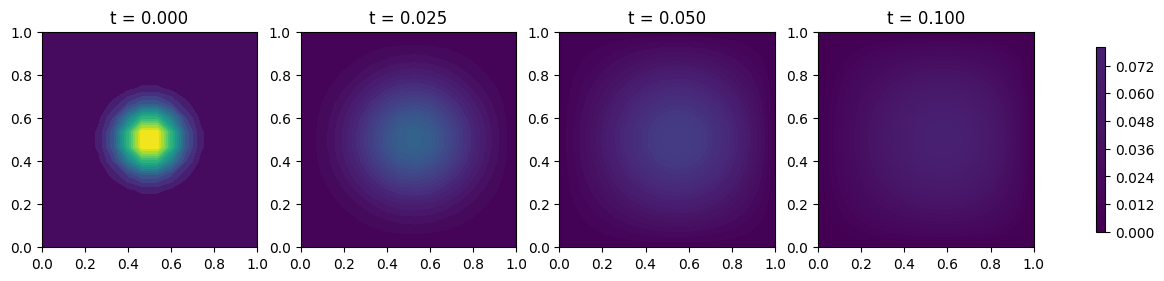

In [4]:
U, Xf, Yf, dt = solve_fdm(nx, ny, Lx, Ly, Tfin, D, k, theta, dt_factor)

Umin, Umax = U.min(), U.max()

# Elegimos 4 instantes: t=0, t=T/4, t=T/2, t=T
instantes = [0, U.shape[0]//4, U.shape[0]//2, U.shape[0]-1]

fig, axs = plt.subplots(1, len(instantes), figsize=(16,4))
for ax, idx in zip(axs, instantes):
    cf = ax.contourf(Xf, Yf, U[idx], levels = 20, vmin = Umin, vmax = Umax)
    ax.set_title(f"t = {idx*dt:.3f}")
    ax.set_aspect('equal')
plt.colorbar(cf, ax=axs, shrink=0.6)
plt.show()